# Simple nomograph implementation

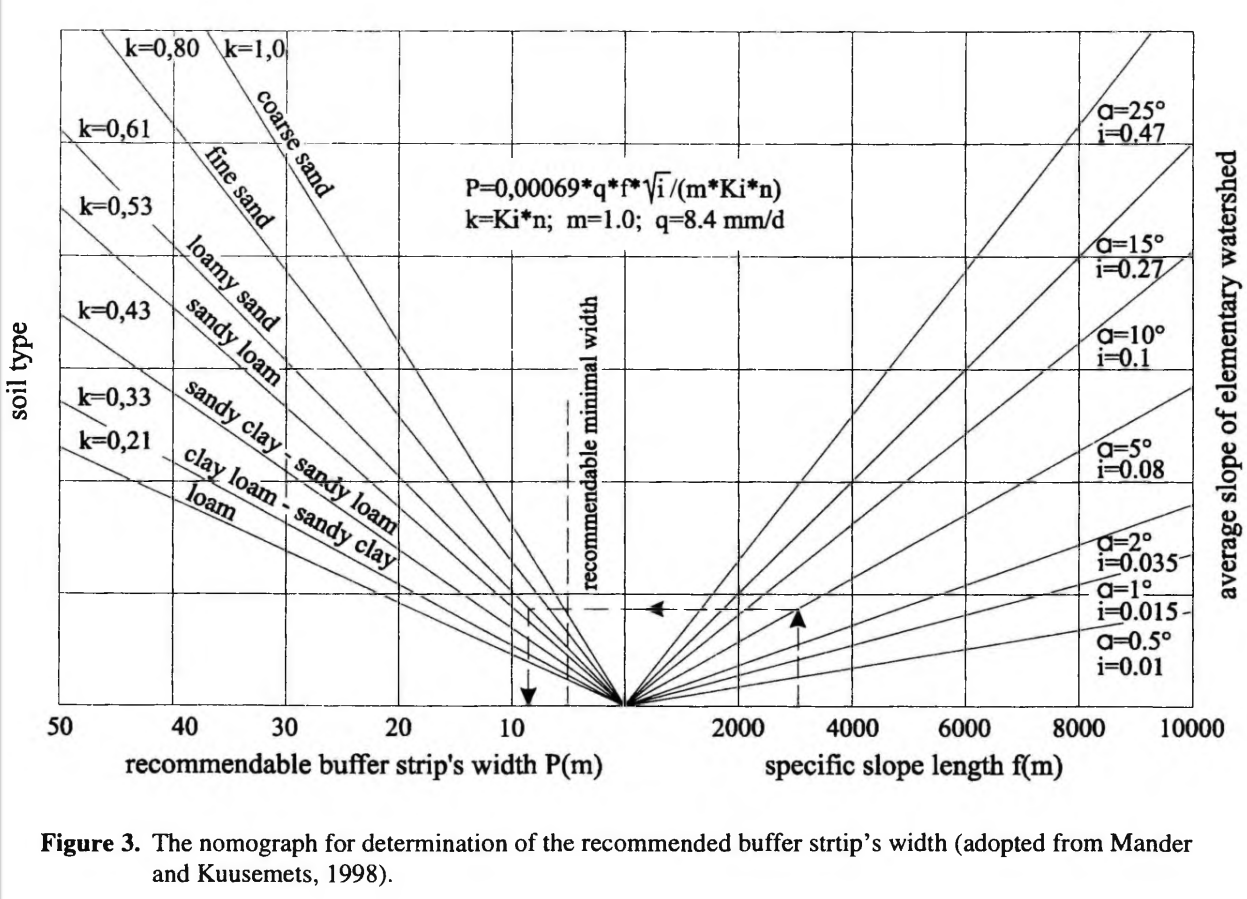

The mean values of the integrated soil parameter k (k = Ki x n) for the main soil types are given as: coarse sand: 1.00, fine sand: 0.80, loamy sand: 0.61, sandy loam: 0.53, sandy clay loam and loam: 0.43, clay loam and sandy clay: 0.33, clay: 0.21.

The angles a

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

,x_alpha,y_nomo_angle,cont_nomo_angle
0,0.5,10.0,11.208352
1,1.0,15.0,14.110109
2,2.0,20.0,19.241275
3,5.0,30.0,30.283566
4,10.0,39.0,39.642041
5,15.0,45.0,44.338385
6,25.0,52.0,52.238452
7,35.0,58.0,57.927409
8,45.0,63.0,63.010412


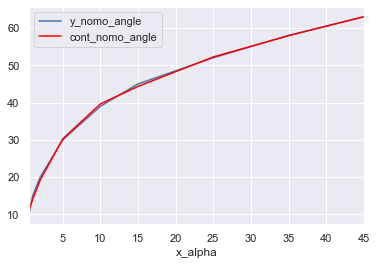

In [148]:
def degr_to_perc_slope(degrees):
    return (np.tan(np.radians(degrees)))*100

def degr_to_perc_fract_slope(degrees):
    return (np.tan(np.radians(degrees)))

def perc_to_degr_slope(perc):
    return np.rad2deg(np.arctan(perc/100))

# Specific slope length f (m) 2000 4000 6000 8000 10000
slope_scale_factor=2000

# Recommendable buffer strip's width P (m) 10 20 30 40 50
buffer_strip_scale=10

# soil types
k_coarse_sand=1.0
nom_a_k7=58.0

k_fine_sand=0.80
nom_a_k6=52.0

k_loamy_sand=0.61
nom_a_k5=45.0

k_sandy_loam=0.53
nom_a_k4=41.0

k_sandy_clay_sandy_loam=0.43
nom_a_k3=34.0

k_clay_loam_sandy_clay=0.33
nom_a_k2=29.0

k_loam=0.21
nom_a_k7=24.0

soil_dict = {
    "coarse_sand" : {"k":1.0,
                     "alpha":58.0
                    },
    "fine_sand" : {"k":0.80,
                   "alpha":52.0
                  },
    "loamy_sand" : {"k":0.61,
                    "alpha":45.0
                   },
    "sandy_loam" : {"k":0.53,
                    "alpha":41.0
                   },
    "sandy_clay_sandy_loam" : {"k":0.43,
                               "alpha":34.0
                              },
    "clay_loam_sandy_clay" : {"k":0.33,
                              "alpha":29.0
                             },
    "loam" : {"k":0.21,
              "alpha":24.0}
}

a9_limes=45.0
nom_a_i9=180.0-117

a8_limes=35.0
nom_a_i8=180.0-122

# slope ranges
a7=25.0
i7=0.47
nom_a_i7=180.0-128

a6=15.0
i6=0.27
nom_a_i6=180.0-135

a5=10.0
i5=0.1
nom_a_i5=180.0-141

a4=5.0
i4=0.08
nom_a_i4=180.0-150

a3=2.0
i3=0.035
nom_a_i3=180.0-160

a2=1.0
i2=0.015
nom_a_i2=180.0-165

a1=0.5
i1=0.01
nom_a_i1=180.0-170

x_sl = np.array([a1, a2, a3, a4, a5, a6, a7, a8_limes, a9_limes])
y_sl = np.array([nom_a_i1, nom_a_i2, nom_a_i3, nom_a_i4, nom_a_i5, nom_a_i6, nom_a_i7, nom_a_i8, nom_a_i9])
pred_sl_fun = np.polyfit(x_sl, y_sl, 5)
pred_sl = np.poly1d(pred_sl_fun)

sl_df = pd.DataFrame({'x_alpha': x_sl, 'y_nomo_angle': y_sl, 'cont_nomo_angle': pred_sl(x_sl)})
display(sl_df)

# gca stands for 'get current axis'
ax = plt.gca()

sl_df.plot(kind='line',x='x_alpha',y='y_nomo_angle',ax=ax)
sl_df.plot(kind='line',x='x_alpha',y='cont_nomo_angle', color='red', ax=ax)

plt.show()

,x_alpha,y_nomo_angle_pred
0,0.5,11.208352
1,1.0,14.110109
2,2.0,19.241275
3,5.0,30.283566
4,10.0,39.642041
5,15.0,44.338385
6,25.0,52.238452
7,30.0,55.728716
8,35.0,57.927409
9,40.0,59.311782


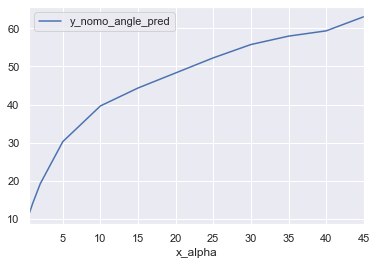

In [149]:
x_sl_test = np.array([a1, a2, a3, a4, a5, a6, a7, 30, 35, 40, 45])
y_sl_test_pred = np.array([pred_sl(a1), pred_sl(a2), pred_sl(a3), pred_sl(a4), pred_sl(a5), pred_sl(a6), pred_sl(a7),
                 pred_sl(30), pred_sl(35), pred_sl(40), pred_sl(45)])

sl_df_test = pd.DataFrame({'x_alpha': x_sl_test, 'y_nomo_angle_pred': y_sl_test_pred})
display(sl_df_test)

# gca stands for 'get current axis'
ax = plt.gca()

sl_df_test.plot(kind='line',x='x_alpha',y='y_nomo_angle_pred',ax=ax)

plt.show()

In [107]:
degr_to_perc_slope(30.76)

59.51738150412657

In [108]:
perc_to_degr_slope(59.51738150412657)

30.76

In [104]:
# degr -> radians -> tan -> x100 -> percent
degrees = 30.76
display(degrees)
display(np.radians(degrees))
display(np.tan(np.radians(degrees)))
display(np.tan(np.radians(degrees))*100)


# percent -> 1/100 -> inv tan -> inv radians -> degr
percent = 59.51738

display(percent)
display(percent/100)
display( np.arctan(percent/100) )
display( np.rad2deg(np.arctan(percent/100)) )

30.76

0.5368632779134558

0.5951738150412657

59.51738150412657

59.51738

0.5951738

0.5368632668065942

30.759999363623713

In [4]:
def select_angle_for_slope_degr(slope_angle_degr):
    return pred_sl(slope_angle_degr)
    
def slope_angle_rel_y_val(slope_angle_degr, slope_len_m):
    slope_rel=slope_len_m/slope_scale_factor
    alpha=select_angle_for_slope_degr(slope_angle_degr)
    y = slope_rel * (np.tan(np.radians(alpha)))
    return y

In [75]:
slope_angle_rel_y_val(35.3, 14)

-0.7183469415729145

In [134]:
select_angle_for_slope_degr(50.3)

86.60960841474697

In [80]:
pred_sl(35)

88.64396077192087

In [8]:
def select_angle_for_soil_class(soil_class):
    try:
        alpha = soil_dict[soil_class]['alpha']
        return alpha
    except KeyError:
        print(f"soil class {soil_class} not existing in dictionary")

select_angle_for_soil_class('coarse_sand')

58.0

In [9]:
def soiltype_rel_x_val(soil_class, y):
    alpha=select_angle_for_soil_class(soil_class)
    beta = 90-alpha
    x = y * (np.tan(np.radians(beta)))
    return x * buffer_strip_scale

In [10]:
soiltype_rel_x_val('loamy_sand', slope_angle_rel_y_val(5, 3100))

8.886577077797186

In [11]:
def nomo_simple(slope_len_m, slope_angle_degr, soil_class):
    nomo_val = soiltype_rel_x_val(soil_class, slope_angle_rel_y_val(slope_angle_degr, slope_len_m))
    return nomo_val

np.round(nomo_simple(1300, 5, 'loamy_sand'), 2)

3.73

In [54]:
nomo_simple(1,1,'coarse_sand')

0.000788643114139294

In [66]:
soil_classes_list = [k for k in soil_dict.keys()]
nomo_simple(5,35.2,soil_classes_list[5])

29.940521328131542

In [14]:
import numpy.ma as ma

import rasterio
from rasterio.plot import show

In [15]:
slope_tif = rasterio.open(r'C:\dev\05_geodata\qgis_map_projects\kik_project\slope_degrees_3301.tif')

display(slope_tif.profile)
display(slope_tif.transform)
display(slope_tif.indexes)
display(slope_tif.nodatavals)
display(slope_tif.nodata)

slope_nodata = slope_tif.nodata

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -99999.0, 'width': 403, 'height': 403, 'count': 1, 'crs': CRS.from_epsg(3301), 'transform': Affine(74.51429776674935, 0.0, 644980.4519,
       0.0, -74.51429776674964, 6470023.9648), 'tiled': False, 'interleave': 'band'}

Affine(74.51429776674935, 0.0, 644980.4519,
       0.0, -74.51429776674964, 6470023.9648)

(1,)

(-99999.0,)

-99999.0

In [16]:
slope_len_tif = rasterio.open(r'C:\dev\05_geodata\qgis_map_projects\kik_project\slope_length_m_3301.tif')

display(slope_len_tif.profile)
display(slope_len_tif.transform)
display(slope_len_tif.indexes)
display(slope_len_tif.nodatavals)
display(slope_len_tif.nodata)

slope_len_nodata = slope_len_tif.nodata

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -99999.0, 'width': 403, 'height': 403, 'count': 1, 'crs': CRS.from_epsg(3301), 'transform': Affine(74.51429776674935, 0.0, 644980.4519,
       0.0, -74.51429776674964, 6470023.9648), 'tiled': False, 'interleave': 'band'}

Affine(74.51429776674935, 0.0, 644980.4519,
       0.0, -74.51429776674964, 6470023.9648)

(1,)

(-99999.0,)

-99999.0

In [17]:
soil_tif = rasterio.open(r'C:\dev\05_geodata\qgis_map_projects\kik_project\soil_text_class.tif')

display(soil_tif.profile)
display(soil_tif.transform)
display(soil_tif.indexes)
display(soil_tif.nodatavals)
display(soil_tif.nodata)

soil_nodata = soil_tif.nodata # but also 0

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 8.0, 'width': 403, 'height': 403, 'count': 1, 'crs': CRS.from_epsg(3301), 'transform': Affine(74.51429776674935, 0.0, 644980.4519,
       0.0, -74.51429776674964, 6470023.9648), 'tiled': False, 'interleave': 'band'}

Affine(74.51429776674935, 0.0, 644980.4519,
       0.0, -74.51429776674964, 6470023.9648)

(1,)

(8.0,)

8.0

In [18]:
slope_band = slope_tif.read(1, masked=True)

slope_band

slope_len_band = slope_len_tif.read(1, masked=True)

soil_band = soil_tif.read(1, masked=True)

In [19]:
uniq_vals = np.unique(soil_band)
display(uniq_vals)

masked_array(data=[0, 1, 2, 3, 4, 5, 6, 7],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=8,
            dtype=int16)

In [20]:
slope_band_x = ma.filled(slope_band, slope_nodata)

slope_len_band_x = ma.filled(slope_len_band, slope_len_nodata)

soil_band_x = ma.filled(soil_band, 0)

(403, 403)

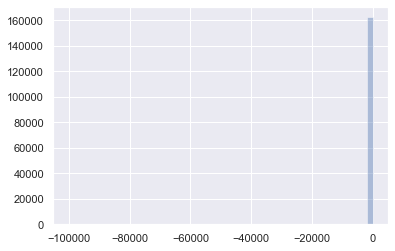

(403, 403)

(403, 403)

In [21]:
display(slope_band_x.shape)
sns.distplot(slope_band.flatten(),kde = False)
plt.show()

display(slope_len_band_x.shape)
display(soil_band_x.shape)

In [48]:
slope_nan = np.count_nonzero(np.isnan(slope_band_x))
if slope_nan > 0:
    print('slope tif has NaN values (e.g. infinite nodata or null), aborting')
    
slope_len_nan = np.count_nonzero(np.isnan(slope_len_band_x))
if slope_len_nan > 0:
    print('slope length tif has NaN values (e.g. infinite nodata or null), aborting')
    
soil_nan = np.count_nonzero(np.isnan(soil_band_x))
if soil_nan > 0:
    print('soil tif has NaN values (e.g. infinite nodata or null), aborting')

In [47]:
np.count_nonzero(np.isnan(slope_len_band_x))

0

In [49]:
buf_recom_val = np.zeros(slope_band_x.shape)

soil_classes_list = [k for k in soil_dict.keys()]

for i in range(0,slope_band_x.shape[1]):
    for j in range(0,slope_band.shape[0]):
        if not soil_band_x[i,j] == 0:
            buf_recom_val[i,j] = nomo_simple(slope_len_band_x[i,j],slope_band_x[i,j],soil_classes_list[soil_band_x[i,j] - 1])
        else:
            buf_recom_val[i,j] = np.nan

In [50]:
buf_recom_val[200,200]

0.5404357970463612

In [37]:
buf_recom_val_x = np.nan_to_num(buf_recom_val, copy=True, nan=-1)

In [38]:
import numpy as np
np.set_printoptions(threshold=np.inf)

print(buf_recom_val_x.flatten())

[-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         

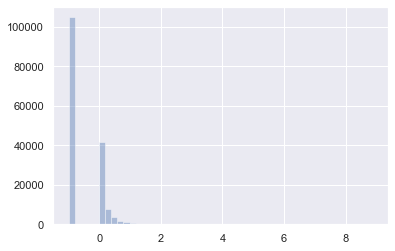

In [39]:
sns.distplot(buf_recom_val_x.flatten(),bins = 50, kde = False)
plt.show()

In [40]:
out_profile = slope_tif.profile.copy()

out_profile.update(dtype=rasterio.float32,
                   count=1,
                   compress='lzw',
                   nodata=-1.0)

display(out_profile)
display(buf_recom_val_x.shape)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -1.0, 'width': 403, 'height': 403, 'count': 1, 'crs': CRS.from_epsg(3301), 'transform': Affine(74.51429776674935, 0.0, 644980.4519,
       0.0, -74.51429776674964, 6470023.9648), 'tiled': False, 'interleave': 'band', 'compress': 'lzw'}

(403, 403)

In [34]:
with rasterio.open(r'C:\dev\05_geodata\qgis_map_projects\kik_project\buffer_strip_width5.tif', "w", **out_profile) as dest:
    dest.write(buf_recom_val_x.astype(rasterio.float32), 1)

In [31]:
slope_tif.profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -99999.0, 'width': 403, 'height': 403, 'count': 1, 'crs': CRS.from_epsg(3301), 'transform': Affine(74.51429776674935, 0.0, 644980.4519,
       0.0, -74.51429776674964, 6470023.9648), 'tiled': False, 'interleave': 'band'}

In [153]:
46 % 45

1